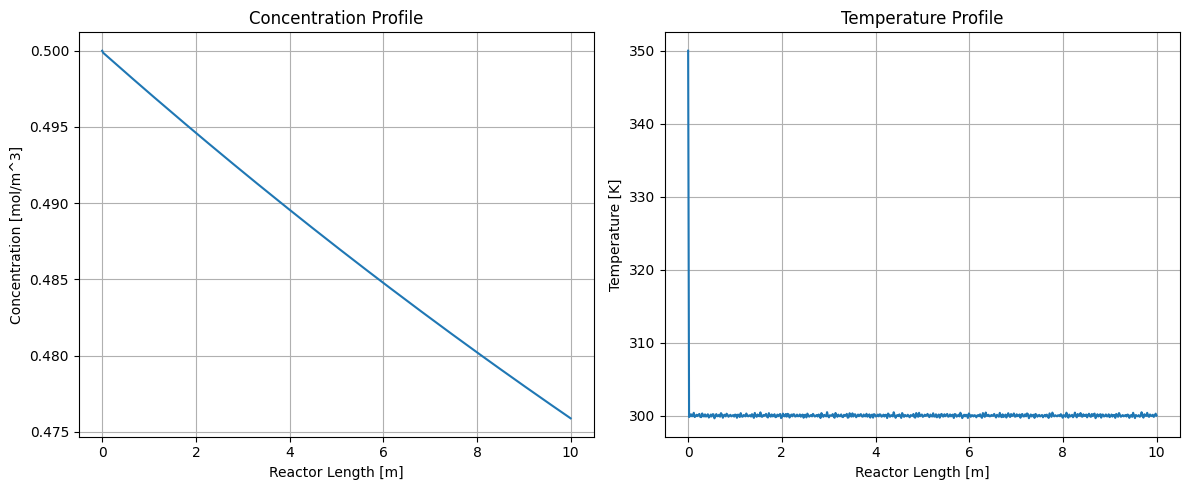

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
Ea = 72750     # Activation energy [J/mol]
R = 8.314      # Gas constant [J/mol/K]
k0 = 7.2e10    # Pre-exponential factor [1/min]
V = 0.1        # Reactor volume [m^3]
F_in = 0.001   # Inlet flow rate [m^3/min]
cA_in = 1.0    # Inlet concentration [mol/m^3]
T_in = 350.0   # Inlet temperature [K]
UA = 50000     # Heat transfer coefficient [J/min/K]
Cp = 0.239     # Heat capacity [J/g/K]
rho = 1000     # Density [g/L]
dHr = -50000   # Reaction enthalpy [J/mol]

# Arrhenius equation for rate constant
def k(T):
    return k0 * np.exp(-Ea / (R * T))

# Differential equations for PFR
def pfr_model(z, y, F_in, cA_in, T_in, UA, V, rho, Cp, dHr):
    cA, T = y
    w = F_in / V  # Space velocity [1/min]
    dcAdz = w * (cA_in - cA) - k(T) * cA
    dTdz = w * (T_in - T) + (-dHr / rho / Cp) * k(T) * cA + (UA / V / rho / Cp) * (300 - T)
    return [dcAdz, dTdz]

# Initial conditions
cA0 = 0.5  # Initial concentration [mol/m^3]
T0 = 350.0  # Initial temperature [K]
IC = [cA0, T0]

# Integration over reactor length
z_span = (0, 10)  # Reactor length [m]
z_points = np.linspace(z_span[0], z_span[1], 500)

# Solve ODE
soln = solve_ivp(pfr_model, z_span, IC, args=(F_in, cA_in, T_in, UA, V, rho, Cp, dHr), t_eval=z_points)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(soln.t, soln.y[0], label='Concentration')
plt.xlabel('Reactor Length [m]')
plt.ylabel('Concentration [mol/m^3]')
plt.title('Concentration Profile')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(soln.t, soln.y[1], label='Temperature')
plt.xlabel('Reactor Length [m]')
plt.ylabel('Temperature [K]')
plt.title('Temperature Profile')
plt.grid(True)

plt.tight_layout()
plt.show()
